# Purpose
This workbook will mainly be used for the IBM Data Science - Applied Data Science Capstone project

# IBM Data Science Capstone Project - Car Accident Severity

## Table of Contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

All major cities face numerous traffic accidents each year, with severity ranging from minor vehicle damage to multiple fatalities.  These accidents can happen in a variety of situations and involve a variable number of vehicles, pedestrians, cyclists and others.  They also happen under a variety of environmental conditions, such as weather, road conditions and lighting.  In this project, we look specifically at traffic accident data from the Seattle area, and are interested in predicting the likely severity of accidents based on environmental conditions.

This could provide multiple benefits, such as: providing the capability to inform drivers of conditions correlated with higher accident severity to raise awareness and encourage safer driving; and allowing emergency responders to plan ahead and be better prepared for severe accidents based on expected environmental conditions.  Both could help reduce the severity of any accidents that happen and/or the damage resulting from said accidents, thus reducing the toll in both human life and on vital municipal resources.

## Data <a name="data"></a>

The data set on historical accidents in the Seattle area consists of 37 variables and 194,673 entries covering: date and time, accident severity, collision type, number of people/pedestrians/bicycles/vehicles involved, number of injuries/serious injuries/fatalities, weather conditions, road conditions, light conditions, location, location details, whether speeding/inattention/drugs/alcohol were involved, and other descriptive characteristics of the accident.

Since we are interested in predicting the likely severity of accidents based on environmental conditions, we will limit our independent variables to environmental variables beyond the control of the driver and set our dependent variable to the severity of the accidents which occur under the given environment.

Thus we will use  WEATHER, ROADCOND and LIGHTCOND as our independent variables to predict our independent variable, SEVERITYCODE.

The process below imports the required libraries for data cleaning and processing, 

### Import Libraries

In [1]:
#importing pandas and numpy

import pandas as pd
import numpy as np

#import matplotlib

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

#importing required libraries from sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Import Data

In [2]:
#importing the Seattle dataset into a pandas dataframe

seattle_df = pd.read_csv('Data-Collisions.csv')
seattle_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
#checking data types of available variables

seattle_df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
#checking general statistics on available numerical variables

seattle_df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### Narrow dataset to relevant variables/entries

In [5]:
#selecting variables of interest

seattle_select_df = seattle_df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
seattle_select_df.shape

(194673, 4)

In [6]:
#check values of columns and count for each value

for column in seattle_select_df.columns.values.tolist():
    print(column)
    print (seattle_select_df[column].value_counts())
    print("")

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

WEATHER
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

ROADCOND
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Of

In [7]:
#set "Unknown", "Other" values to nan

no_unknown_other_df = seattle_select_df.replace("Unknown", np.nan).replace("Other", np.nan)

#set low occurance WEATHER values and those unlikely to appear on a regular basis (particularly within the city) to nan

no_rare_WEATHER_df = no_unknown_other_df.replace("Partly Cloudy", np.nan).replace("Severe Crosswind", np.nan).replace("Blowing Sand/Dirt", np.nan)

#set low occurance ROADCOND values and those unlikely to appear on a regular basis (particularly within the city) to nan

no_rare_ROADCOND_df = no_rare_WEATHER_df.replace("Oil", np.nan).replace("Sand/Mud/Dirt", np.nan).replace("Standing Water", np.nan)

#set low occurance LIGHTCOND values and those unlikely to appear on a regular basis (particularly within the city) to nan

no_rare_COND_df = no_rare_ROADCOND_df.replace("Dark - Unknown Lighting", np.nan)

seattle_cleaned_df = no_rare_COND_df.dropna()

seattle_cleaned_df = seattle_cleaned_df.reset_index(drop=True)

for column in seattle_cleaned_df.columns.values.tolist():
    print(column)
    print (seattle_cleaned_df[column].value_counts())
    print("")

SEVERITYCODE
1    114061
2     55582
Name: SEVERITYCODE, dtype: int64

WEATHER
Clear                       108763
Raining                      32512
Overcast                     26890
Snowing                        823
Fog/Smog/Smoke                 551
Sleet/Hail/Freezing Rain       104
Name: WEATHER, dtype: int64

ROADCOND
Dry           121442
Wet            46299
Ice             1073
Snow/Slush       829
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    112454
Dark - Street Lights On      46643
Dusk                          5639
Dawn                          2399
Dark - No Street Lights       1396
Dark - Street Lights Off      1112
Name: LIGHTCOND, dtype: int64



In [8]:
#cleaned dataset before encoding

seattle_cleaned_df

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
169638,2,Clear,Dry,Daylight
169639,1,Raining,Wet,Daylight
169640,2,Clear,Dry,Daylight
169641,2,Clear,Dry,Dusk


### Encode categorical data

In [9]:
#create temp dataframe to encode categorical variables

temp_encoding_df = seattle_cleaned_df

#note: LabelEncoder is not used since it is unable to encode values for categorical variables in a user specified order

#encode WEATHER to integer values ranked nominally by visibility (Clear through normal rain/snow, more esoteric weather at the end)
temp_encoding_df['WEATHER_CODE'] = temp_encoding_df['WEATHER'].map({'Clear':0, 'Overcast':1, 'Raining':2, 'Sleet/Hail/Freezing Rain':3, 'Snowing':4, 'Fog/Smog/Smoke':5})

#encode ROADCOND to integer values ranked nominally from Dry to Ice with less common values at the end

temp_encoding_df['ROADCOND_CODE'] = temp_encoding_df['ROADCOND'].map({'Dry':0, 'Wet':1, 'Snow/Slush':2, 'Ice':3})

#encode LIGHTCOND to integer values ranked nominally from Dry to Ice with less common values at the end

temp_encoding_df['LIGHTCOND_CODE'] = temp_encoding_df['LIGHTCOND'].map({'Daylight':0, 'Dawn':1, 'Dusk':2, 'Dark - Street Lights On':3, 'Dark - Street Lights Off':4, 'Dark - No Street Lights':5})

#generate encoded dataframe

seattle_encoded_df = temp_encoding_df[['SEVERITYCODE', 'WEATHER_CODE', 'ROADCOND_CODE', 'LIGHTCOND_CODE']]
seattle_encoded_df

,SEVERITYCODE,WEATHER_CODE,ROADCOND_CODE,LIGHTCOND_CODE
0,2,1,1,0
1,1,2,1,3
2,1,1,0,0
3,1,0,0,0
4,2,2,1,0
...,...,...,...,...
169638,2,0,0,0
169639,1,2,1,0
169640,2,0,0,0
169641,2,0,0,2


### Preprocessing

In [10]:
#set X for modeling

X = seattle_encoded_df[['WEATHER_CODE', 'ROADCOND_CODE', 'LIGHTCOND_CODE']].values

X

array([[1, 1, 0],
       [2, 1, 3],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 2],
       [0, 1, 0]], dtype=int64)

In [11]:
#normalize data

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[ 0.4845433 ,  1.3738043 , -0.69034376],
       [ 1.63627901,  1.3738043 ,  1.43852641],
       [ 0.4845433 , -0.59346323, -0.69034376],
       ...,
       [-0.66719242, -0.59346323, -0.69034376],
       [-0.66719242, -0.59346323,  0.72890302],
       [-0.66719242,  1.3738043 , -0.69034376]])

In [12]:
#set y for modeling

y = seattle_encoded_df['SEVERITYCODE'].values

y

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [13]:
#create train test split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135714, 3) (135714,)
Test set: (33929, 3) (33929,)



## Methodology <a name="methodology"></a>

As we are predicting severity of accidents based on environmental factors and all data is labeled categorical data, we will be using clustering models for our prediction.

Below we setup KNN, Decision Tree and Logistic Regression as our potential clustering model candidates and will review the results in the section below.

### K Nearest Neighbor (KNN)

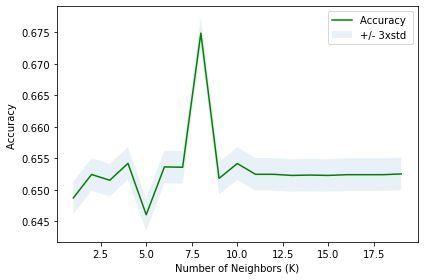

The best accuracy was 0.6748798962539421 with k= 8


In [14]:
#test K through 20 to determine the ideal number of neighbors

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [15]:
#create KNN model with k that shows the greatest accuracy

k = 8
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

### Decision Tree

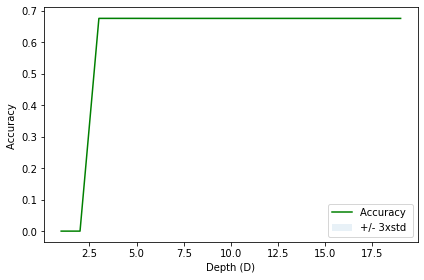

The best accuracy was 0.6755577824280115 with d= 3


In [16]:
#test D through 20 to determine the ideal depth

Ds = 20
mean_acc = np.zeros((Ds-1))
std_acc = np.zeros((Ds-1))
ConfustionMx = [];
for n in range(3,Ds):
    decision = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=decision.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

plt.plot(range(1,Ds),mean_acc,'g')
plt.fill_between(range(1,Ds),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth (D)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with d=", mean_acc.argmax()+1) 

In [17]:
#create Decision Tree model with the d that shows the greatest accuracy

d = 3
decision = DecisionTreeClassifier(criterion="entropy", max_depth = d).fit(X_train,y_train)
decision

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Logistic Regression

In [18]:
#test different Logistic Regression methods to determine the one with the greatest accuracy

LRnewton = LogisticRegression(C=0.01, solver='newton-cg')
LRnewton.fit(X_train,y_train)
print("newton-cg's Accuracy: ", metrics.accuracy_score(y_test, LRnewton.predict(X_test)))

LRlbfgs = LogisticRegression(C=0.01, solver='lbfgs')
LRlbfgs.fit(X_train,y_train)
print("lbfgs's Accuracy: ", metrics.accuracy_score(y_test, LRlbfgs.predict(X_test)))

LRliblinear = LogisticRegression(C=0.01, solver='liblinear')
LRliblinear.fit(X_train,y_train)
print("liblinear's Accuracy: ", metrics.accuracy_score(y_test, LRliblinear.predict(X_test)))

LRsag = LogisticRegression(C=0.01, solver='sag')
LRsag.fit(X_train,y_train)
print("sag's Accuracy: ", metrics.accuracy_score(y_test, LRsag.predict(X_test)))

LRsaga = LogisticRegression(C=0.01, solver='saga')
LRsaga.fit(X_train,y_train)
print("saga's Accuracy: ", metrics.accuracy_score(y_test, LRsaga.predict(X_test)))

newton-cg's Accuracy:  0.6755577824280115
lbfgs's Accuracy:  0.6755577824280115
liblinear's Accuracy:  0.6755577824280115
sag's Accuracy:  0.6755577824280115
saga's Accuracy:  0.6755577824280115


In [19]:
#create Logistic Regression model with the method that shows the greatest accuracy (all seem to provide the same result)

logistic = LRsag.fit(X_train,y_train)
logistic

LogisticRegression(C=0.01, solver='sag')

## Results  <a name="results"></a>

In this section, we test the different models to ascertain Jaccard Similarity Score, F1-Score and Log Loss (Logistic Regression only) to assess which is the optimal model to use for predicting the severity of a potential accident from environmental conditions.

We then use the chosen model to determine which conditions are most likely to associated with a higher accident severity.

In [20]:
#calculate Jaccard Similarity Score, F1-Score and Log Loss (Logistic Regression only)

jaccard_neigh = jaccard_score(y_test, neigh.predict(X_test))
f1_neigh = f1_score(y_test, neigh.predict(X_test), average='weighted')

jaccard_decision = jaccard_score(y_test, decision.predict(X_test))
f1_decision = f1_score(y_test, decision.predict(X_test), average='weighted')

jaccard_logistic = jaccard_score(y_test, logistic.predict(X_test))
f1_logistic = f1_score(y_test, logistic.predict(X_test), average='weighted')
log_loss_logistic = log_loss(y_test, logistic.predict_proba(X_test))

In [21]:
#create accuracy table to report on results of different evaluation metrics

report = {'Algorithm': ['KNN', 'Decision Tree', 'Logistic Regression'],
        'Jaccard': [jaccard_neigh, jaccard_decision, jaccard_logistic],
        'F1-score': [f1_neigh, f1_decision, f1_logistic],
        'Log Loss': ['NA', 'NA', log_loss_logistic]}

report_df = pd.DataFrame(report, columns = ['Algorithm', 'Jaccard', 'F1-score', 'Log Loss'])

report_df

,Algorithm,Jaccard,F1-score,Log Loss
0,KNN,0.674544,0.546306,NA
1,Decision Tree,0.675558,0.544748,NA
2,Logistic Regression,0.675558,0.544748,0.62928


## Discussion <a name="discussion"></a>

Discussion content

## Conclusion <a name="conclusion"></a>

Conclusion content